##### Tutorial 03: Building Single-Layer-NN
PyTorch is a popular open-source machine learning framework that provides flexibility and ease of use for developing neural networks. In this tutorial, we'll walk through the steps to build, train, and evaluate a simple neural network for predicting car fule efficiency.

##### Predicting Car Fuel Efficiency
Assume that you want to predict the car fuel efficiency based on the **Engine size**, **Car Weight** and **Number of cylinders**. 

| Index | $ x_1 $ (Engine size in liters) | $ x_2 $ (Car weight in pounds) | $ x_3 $ (Number of cylinders) | $ y $ (Fuel efficiency in MPG) |
|-------|------------------------------------|-----------------------------------|---------------------------------|----------------------------------|
| 1     | 2.0                                | 3000                              | 4                               | 30                               |
| 2     | 3.5                                | 4000                              | 6                               | 20                               |
| 3     | 1.8                                | 2800                              | 4                               | 35                               |
| 4     | 2.5                                | 3500                              | 6                               | 25                               |
| 5     | 3.0                                | 3700                              | 6                               | 22                               |

In the above problem, the input data point has 3 features, making the feature vector a $1 \times 3$. Assuming that there is no hidden layer, the **single-layer neural network** will consist of an input layer with three neurons (one for each feature) and an output layer with one neuron (predicting the fuel efficiency in MPG). This simple network can be represented graphically as: 

<img src="imgs/slp.png" width=600px>

And Mathematically, 

$y = x \cdot W + b$

where:

- $x$ is the input feature vector ($1 \times 3$).
- $W$ is the weight matrix ($3 \times 1$), representing the connections between input features and the output.
- $b$ is the bias term ($1 \times 1$).
- $y$ is the predicted output ($1 \times 1$), representing the fuel efficiency.

We'll use **Mean Squared Error (MSE)** as the loss function to measure the difference between the predicted and actual values of fuel efficiency. The optimizer we choose will update the weights and biases during training to minimize this loss.

---

In this case, we do not need **an activation function** for the output layer of the neural network. Because: 

- The task is regression, where the goal is to predict a continuous value (fuel efficiency in MPG).
- Activation functions like **ReLU**, **Sigmoid**, or **Tanh** are often used in hidden layers or in specific cases for output layers. However, for regression problems, the output should ideally **be a linear transformation of the inputs to preserve the continuous nature of the target variable**.

In [1]:
import pandas as pd
data = {
    "x1": [2.0, 3.5, 1.8, 2.5, 3.0],
    "x2": [3000, 4000, 2800, 3500, 3700],
    "x3": [4, 6, 4, 6, 6],
    "y": [30, 20, 35, 25, 22]
}

df = pd.DataFrame(data)

In PyTorch, The **torch.nn** module is the building block for creating and training neural networks in PyTorch. It provides a variety of predefined layers, loss functions, and utilities for defining and working with neural networks.
Usage in code:
- Define neural network architectures using layers like nn.Linear (**fully connected layers**), nn.Conv2d (**convolutional layers**), etc.
- Use loss functions like nn.CrossEntropyLoss or nn.MSELoss.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class SingleLayerNN(nn.Module):
    def __init__(self):
        super(SingleLayerNN, self).__init__()
        self.fc = nn.Linear(3, 1)  

    def forward(self, x):
        return self.fc(x)

model = SingleLayerNN()
print(model.fc.weight)
print(model.fc.bias)

####manual define the bias
model.fc.weight.data.normal_(std=0.1)
model.fc.bias.data.fill_(0)
print(model.fc.bias, model.fc.weight)

X = df[["x1", "x2", "x3"]].values
y_actual = df['y'].values 
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

X_tensor = torch.tensor(X_normalized, dtype=torch.float32)  
y_tensor = torch.tensor(y_actual, dtype=torch.float32).view(-1, 1)  

y_pred = model.forward(X_tensor)
print('Predicted Fuel Consumption:', y_pred.detach().numpy().flatten())

Parameter containing:
tensor([[-0.2063,  0.1313,  0.5455]], requires_grad=True)
Parameter containing:
tensor([-0.4465], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True) Parameter containing:
tensor([[-0.1627, -0.1300,  0.0648]], requires_grad=True)
Predicted Fuel Consumption: [ 0.18316345 -0.36676973  0.2936989   0.03907248 -0.14916511]


The predicted results you are seeing, such as [-0.0462392, -0.01373153, -0.02189323, 0.05566421, 0.02619975], are not meaningful because they are in a range that is far from the expected fuel efficiency values (e.g., 20, 25, 30 MPG). The reason for this is because we haven't trained the model yet. All weights are initialized **radonmly**. 

Below code trains the model: 

In [3]:
criterion = nn.MSELoss()  
optimizer = optim.SGD(model.parameters(), lr=0.01)  
epochs = 1000

for epoch in range(epochs):
    model.train()
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)

    # Zero gradients, backward pass, optimizer step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 200 == 0:  # Print every 200 epochs
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

y_pred = model.forward(X_tensor)
print("Predicted Fuel Efficiency:", y_pred.detach().numpy().flatten())

df_plot = pd.DataFrame({
    'Actual': y_actual,
    'Predicted': y_pred.detach().numpy().flatten()
})

Epoch [200/1000], Loss: 1.4953
Epoch [400/1000], Loss: 1.2419
Epoch [600/1000], Loss: 1.2195
Epoch [800/1000], Loss: 1.1996
Epoch [1000/1000], Loss: 1.1809
Predicted Fuel Efficiency: [31.627844 19.351091 33.405487 25.082766 22.532581]


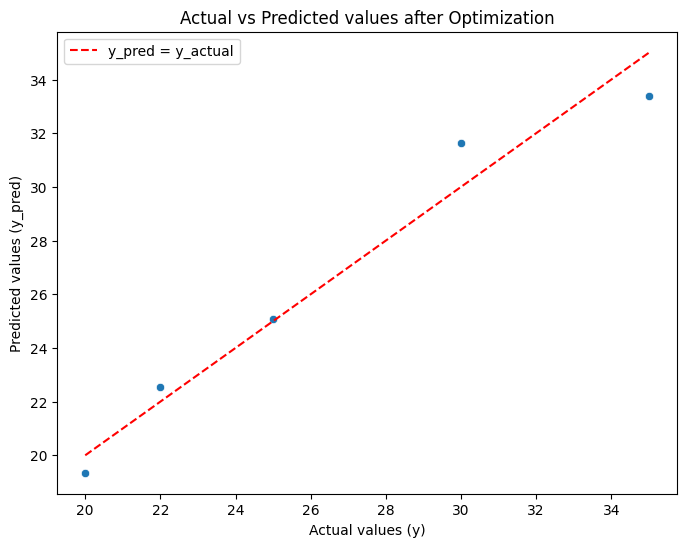

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Actual', y='Predicted')
plt.plot([df_plot['Actual'].min(), df_plot['Actual'].max()],
         [df_plot['Actual'].min(), df_plot['Actual'].max()],
         color='red', linestyle='--', label='y_pred = y_actual')
plt.title('Actual vs Predicted values after Optimization')
plt.xlabel('Actual values (y)')
plt.ylabel('Predicted values (y_pred)')
plt.legend()
plt.show()

##### 1. Loss Function: `criterion = nn.MSELoss()`

This line defines the **Mean Squared Error (MSE)** as the loss function. The MSE is used to measure how far the predicted outputs are from the actual values (the target).

##### Mathematical Definition of MSE:

Given the predicted values $\hat{y}_i$ and the actual target values $y_i$ for each sample $i$, the Mean Squared Error is calculated as:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2
$$

Where:
- $N$ is the number of samples in the dataset.
- $\hat{y}_i$ is the predicted value for the $i$-th sample (output from the model).
- $y_i$ is the actual value (target) for the $i$-th sample.

The MSE gives the average squared difference between the predicted and actual values. The goal of training is to minimize this error (i.e., make the predictions as close as possible to the actual values).

##### 2. Optimizer: `optimizer = optim.SGD(model.parameters(), lr=0.01)`

This line defines the **Stochastic Gradient Descent (SGD)** optimizer, which is responsible for adjusting the model's weights and biases during training. The optimizer uses the gradient of the loss function with respect to the model's parameters to update them in the direction that minimizes the loss.

###### Mathematical Explanation of SGD:

Let $\theta$ represent the parameters of the model (weights and biases). The goal is to minimize the loss function $\mathcal{L}(\theta)$, which in this case is the MSE loss. The optimizer updates the parameters in the opposite direction of the gradient of the loss function with respect to those parameters.

The update rule for SGD is given by:

$$
\theta \leftarrow \theta - \eta \nabla_\theta \mathcal{L}(\theta)
$$

Where:
- $\theta$ are the model parameters (weights and biases).
- $\eta$ is the **learning rate** (here $\eta = 0.01$).
- $\nabla_\theta \mathcal{L}(\theta)$ is the gradient of the loss function $\mathcal{L}(\theta)$ with respect to the parameters $\theta$.

This means that at each step, the optimizer adjusts the parameters by a small amount in the direction that reduces the loss, determined by the gradient of the loss with respect to the parameters. The learning rate $\eta$ controls how large the updates are — smaller values make the updates more gradual, while larger values can make the updates faster but risk overshooting the optimal solution.

##### Summary:
- **MSE Loss**: Measures the error between predicted values and actual values.
- **SGD Optimizer**: Updates model parameters based on the gradient of the loss function, aiming to minimize the error. The learning rate controls the step size of these updates.

---


##### Task: Create a Neural Network Model with One Hidden Layer

In this task, you will create a neural network with one hidden layer consisting of 2 neurons and 1 output neuron. The model will predict car fuel efficiency based on the input features: **Engine size**, **Car weight**, and **Number of cylinders**.

###### Steps:

1. **Define the Model**: Create a simple neural network class using PyTorch with one hidden layer consisting of 2 neurons. Use the following architecture:
   - **Input Layer**: 3 neurons (one for each input feature: Engine size, Car weight, Number of cylinders)
   - **Hidden Layer**: 2 neurons
   - **Output Layer**: 1 neuron (predicted fuel efficiency)

2. **Choose the Activation Function**: Use the **ReLU** activation function for the hidden layer.

3. **Set up the Loss Function and Optimizer**: Use Mean Squared Error (MSE) loss function and Stochastic Gradient Descent (SGD) optimizer.

4. **Train the Model**: Train the model using the car fuel efficiency data, normalize the input features, and update the weights and biases using the optimizer.

5. **Make Predictions**: After training, use the model to predict fuel efficiency for the given input features.

<img src="imgs/nn_one_hidden_layer.png" width=600px>

#### Activation functions

##### What is an Activation Function?

An activation function is a mathematical function applied to the output of each neuron in a neural network. It helps decide whether a neuron should be activated or not, based on the input. Without activation functions, the neural network would only be able to perform linear transformations, which limits its ability to learn complex patterns.

##### The Role of Activation Functions:
1. **Introduce Non-Linearity**: Most real-world data are non-linear. Activation functions help neural networks learn non-linear decision boundaries.
2. **Determine Output**: The activation function determines the output of each neuron in the network based on the input received.

#### Common Types of Activation Functions

##### 1. **Sigmoid Activation Function**

The **Sigmoid** activation function squashes input values into the range (0, 1). It is often used in binary classification problems.

**Mathematical Formula**:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
Where:
- $ x $ is the input to the neuron.
- $ \sigma(x) $ is the output of the sigmoid function.

**Properties**:
- Outputs values between 0 and 1.
- It is used in the output layer of binary classifiers.
- The sigmoid function is **differentiable**, which allows the model to be trained via backpropagation.

**Example**:
If $ x = 2 $, then:
$$
\sigma(2) = \frac{1}{1 + e^{-2}} \approx 0.88
$$

##### 2. **Hyperbolic Tangent (Tanh) Activation Function**

The **Tanh** (hyperbolic tangent) function is similar to the sigmoid but scales the output to the range (-1, 1). It is generally preferred over the sigmoid when working with hidden layers.

**Mathematical Formula**:
$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$
Where:
- $ x $ is the input to the neuron.
- $ \tanh(x) $ is the output of the tanh function.

**Properties**:
- Outputs values between -1 and 1.
- The tanh function is **differentiable** and is used when we need outputs that can be both positive and negative.

**Example**:
If $ x = 1 $, then:
$$
\tanh(1) = \frac{e^1 - e^{-1}}{e^1 + e^{-1}} \approx 0.76
$$

##### 3. **ReLU (Rectified Linear Unit) Activation Function**

The **ReLU** activation function is one of the most commonly used activation functions in modern neural networks. It outputs the input directly if it is positive, otherwise, it outputs zero.

**Mathematical Formula**:
$$
\text{ReLU}(x) = \max(0, x)
$$
Where:
- $ x $ is the input to the neuron.
- The output is either 0 if $ x $ is less than 0, or $ x $ itself if $ x $ is greater than 0.

**Properties**:
- It is computationally efficient.
- Helps with the vanishing gradient problem by allowing gradients to flow for positive values.
- However, it can cause dead neurons when inputs are negative (which i


In practice, the **ReLU function is used almost exclusively as the activation function for hidden layers.**

Predicted Fuel Consumption: [ 0.335535   -0.81877214  0.335535   -0.12897891 -0.3177027 ]
Epoch [200/1000], Loss: 1.0282
Epoch [400/1000], Loss: 0.8541
Epoch [600/1000], Loss: 0.7485
Epoch [800/1000], Loss: 0.6871
Epoch [1000/1000], Loss: 0.6532
Predicted Fuel Efficiency: [30.86945  19.279713 34.14342  24.655235 23.06691 ]
Parameter containing:
tensor([[-0.0158,  0.3506, -0.3838],
        [ 0.8138, -2.2451,  0.2227]], requires_grad=True)
Parameter containing:
tensor([-0.3218,  3.8750], requires_grad=True)
Parameter containing:
tensor([[-0.6345,  4.3359]], requires_grad=True)
Parameter containing:
tensor([9.6012], requires_grad=True)


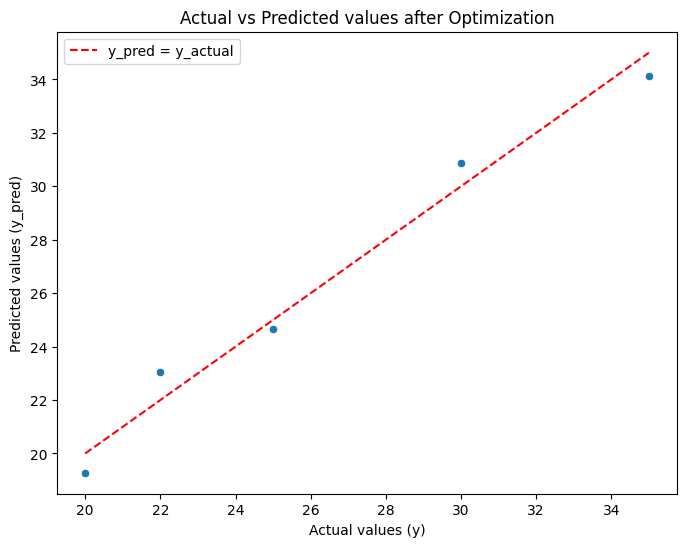

In [5]:
class SimpleNNWithHiddenLayer(nn.Module):
    def __init__(self):
        super(SimpleNNWithHiddenLayer, self).__init__()
        self.fc1 = nn.Linear(3, 2)  
        self.relu = nn.ReLU()       
        self.fc2 = nn.Linear(2, 1)  

    def forward(self, x):
        x = self.fc1(x)  
        x = self.relu(x) 
        x = self.fc2(x)  
        return x

model = SimpleNNWithHiddenLayer()
X = df[["x1", "x2", "x3"]].values
y_actual = df['y'].values 
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

X_tensor = torch.tensor(X_normalized, dtype=torch.float32)  
y_tensor = torch.tensor(y_actual, dtype=torch.float32).view(-1, 1)  

y_pred = model.forward(X_tensor)
print('Predicted Fuel Consumption:', y_pred.detach().numpy().flatten())

criterion = nn.MSELoss()  
optimizer = optim.SGD(model.parameters(), lr=0.01)  
epochs = 1000

for epoch in range(epochs):
    model.train()
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)

    # Zero gradients, backward pass, optimizer step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 200 == 0:  # Print every 200 epochs
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

y_pred = model.forward(X_tensor)
print("Predicted Fuel Efficiency:", y_pred.detach().numpy().flatten())

df_plot = pd.DataFrame({
    'Actual': y_actual,
    'Predicted': y_pred.detach().numpy().flatten()
})

print(model.fc1.weight)
print(model.fc1.bias)
print(model.fc2.weight)
print(model.fc2.bias)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Actual', y='Predicted')
plt.plot([df_plot['Actual'].min(), df_plot['Actual'].max()],
         [df_plot['Actual'].min(), df_plot['Actual'].max()],
         color='red', linestyle='--', label='y_pred = y_actual')
plt.title('Actual vs Predicted values after Optimization')
plt.xlabel('Actual values (y)')
plt.ylabel('Predicted values (y_pred)')
plt.legend()
plt.show()

**Question**: Does adding a hidden layer improve the performance of the model in predicting fuel consumption, and why or why not?

Instead of creating your own class, you can use `torch.nn.Sequential` to build a simple neural network model. `torch.nn.Sequential` allows you to define the layers of the model in a linear fashion without needing to manually define a forward method.

In [6]:
import torch
import torch.nn as nn


model = nn.Sequential(
    nn.Linear(3, 2),  
    nn.ReLU(),        
    nn.Linear(2, 1)   
)

X = df[["x1", "x2", "x3"]].values
y_actual = df['y'].values
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

X_tensor = torch.tensor(X_normalized, dtype=torch.float32)
y_tensor = torch.tensor(y_actual, dtype=torch.float32).view(-1, 1)

y_pred = model(X_tensor)
print(y_pred)

criterion = nn.MSELoss()  
optimizer = optim.SGD(model.parameters(), lr=0.01)  
epochs = 1000

for epoch in range(epochs):
    model.train()
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)

    # Zero gradients, backward pass, optimizer step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = model.forward(X_tensor)
print("Predicted Fuel Efficiency:", y_pred.detach().numpy().flatten())

df_plot = pd.DataFrame({
    'Actual': y_actual,
    'Predicted': y_pred.detach().numpy().flatten()
})

# Hidden Lyaer: weights and biases
fc1_weights = model[0].weight.data.detach().numpy()
fc1_bias = model[0].bias.data.detach().numpy() 

# Output Layer: weights and biases
fc2_weights = model[2].weight.data.detach().numpy()  
fc2_bias = model[2].bias.data.detach().numpy()      


print("First Layer Weights (fc1):")
print(fc1_weights)
print("First Layer Biases (fc1):")
print(fc1_bias)

print("Second Layer Weights (fc2):")
print(fc2_weights)
print("Second Layer Biases (fc2):")
print(fc2_bias)




tensor([[0.6908],
        [1.3750],
        [0.6908],
        [0.6908],
        [0.8841]], grad_fn=<AddmmBackward0>)
Predicted Fuel Efficiency: [30.288532 20.040173 34.729065 25.128769 21.864944]
First Layer Weights (fc1):
[[-0.34158134 -2.5675564   0.4503015 ]
 [ 0.81546813  0.94958794  1.082183  ]]
First Layer Biases (fc1):
[2.7315552  0.66046244]
Second Layer Weights (fc2):
[[3.5001042 1.6210227]]
Second Layer Biases (fc2):
[13.472467]
